<div style="text-align:center;">
<h1>William Playfair — Blé & Salaires (1565–1821)</h1>
<p><strong>October 04, 2025</strong></p>
</div>

Notebook en **trois parties** :
1) **Reproduction** du graphique de Playfair (barres blé + surface/courbe salaires).
2) **Présentation améliorée** : axes jumeaux avec **unités correctes**.
3) **Pouvoir d’achat** : présentation avec  **bulles de différentes tailles et dégradé de couleurs** (taille = pouvoir d’achat, couleur = année).

**Rappels d’unités** : 1 £ = 20 shillings (s), 1 s = 12 pence (d) — Prix blé : s/quarter (≈6.8 kg) — Salaires : s/semaine.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 3)
KG_PER_QUARTER = 6.8


## Chargement des données

In [2]:
URL = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'
df = pd.read_csv(URL)
df.columns = [c.strip() for c in df.columns]
df = df.rename(columns={'Year':'year','Wheat':'wheat','Wages':'wages'})
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
df['wheat'] = pd.to_numeric(df['wheat'], errors='coerce')
df['wages'] = pd.to_numeric(df['wages'], errors='coerce')
df = df.sort_values('year').reset_index(drop=True)
display(df.head())
print('Années:', int(df['year'].min()), '→', int(df['year'].max()))
print('Nb. valeurs manquantes (wages):', df['wages'].isna().sum())


rownames  year  wheat  wages
0         1  1565   41.0   5.00
1         2  1570   45.0   5.05
2         3  1575   42.0   5.08
3         4  1580   49.0   5.12
4         5  1585   41.5   5.15

Années: 1565 → 1821
Nb. valeurs manquantes (wages): 3


# Partie 1 — Reproduction du graphique de Playfair
Barres pour le **prix du blé** et **surface bleue + courbe rouge** pour les **salaires**, superposées sur **un seul graphique** avec une **échelle commune en shillings**.

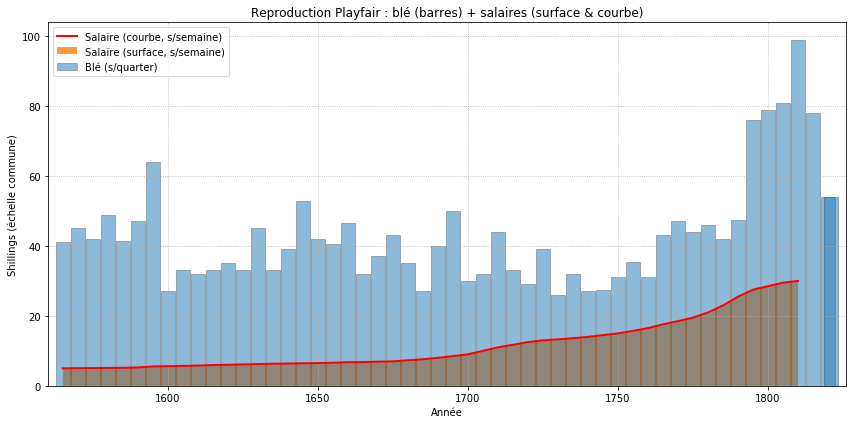

In [11]:
years = df['year'].astype(float).values
wheat = df['wheat'].values
wages = df['wages'].values

year_diffs = np.diff(years)
default_width = np.nanmedian(year_diffs) if len(year_diffs)>0 else 5.0
bar_width = 0.9 * default_width

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(years, wheat, width=bar_width, align='center', edgecolor='black', linewidth=0.5, alpha=0.5, label='Blé (s/quarter)')
mask = ~np.isnan(wages)
years_w = years[mask]
wages_w = wages[mask]
ax.fill_between(years_w, wages_w, 0, alpha=0.8, label='Salaire (surface, s/semaine)')
ax.plot(years_w, wages_w, color='red', linewidth=2.0, label='Salaire (courbe, s/semaine)')
ax.set_title("Reproduction Playfair : blé (barres) + salaires (surface & courbe)")
ax.set_xlabel('Année')
ax.set_ylabel('Shillings (échelle commune)')
ax.grid(True, linestyle=':')
ax.set_xlim(years.min() - default_width, years.max() + default_width)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


Ce graphique juxtapose le **coût du blé** (barres) et le **salaire** (surface + courbe) sur la **même échelle** en shillings. On perçoit la dynamique conjointe et l’augmentation progressive des salaires relativement aux niveaux de prix.

# Partie 2 — Présentation améliorée (axes jumeaux & unités correctes)
barres pour le blé et marqueurs pour les salaires, avec **deux ordonnées** et des **couleurs associées aux axes**.

## Graphique — Barres (blé) + marqueurs (salaires), couleurs = axes

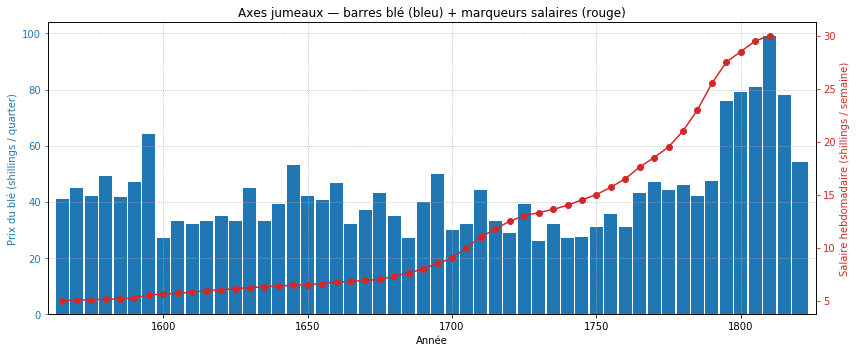

In [5]:
fig, ax_left = plt.subplots(figsize=(12, 5))
ax_right = ax_left.twinx()

color_left = 'tab:blue'   # blé
color_right = 'tab:red'   # salaires

ax_left.bar(years, wheat, width=bar_width, align='center', color=color_left)
mask = ~np.isnan(wages)
ax_right.plot(years[mask], wages[mask], marker='o', linestyle='-', color=color_right)

ax_left.set_xlabel('Année')
ax_left.set_ylabel('Prix du blé (shillings / quarter)', color=color_left)
ax_right.set_ylabel('Salaire hebdomadaire (shillings / semaine)', color=color_right)
ax_left.tick_params(axis='y', colors=color_left)
ax_right.tick_params(axis='y', colors=color_right)
ax_left.set_title('Axes jumeaux — barres blé (bleu) + marqueurs salaires (rouge)')
ax_left.grid(True, linestyle=':')
ax_left.set_xlim(years.min() - default_width, years.max() + default_width)
plt.tight_layout()
plt.show()


L’**axe gauche (bleu)** encode le **prix du blé** et l’**axe droit (rouge)** encode le **salaire**. L’appariement des couleurs aux **étiquettes d’axes** facilite la lecture et distingue clairement les unités.

# Partie 3 — Pouvoir d’achat
On calcule le **pouvoir d’achat** (kg de blé/semaine) et on trace un **diagramme en bulles** : taille = pouvoir d’achat, couleur = année.

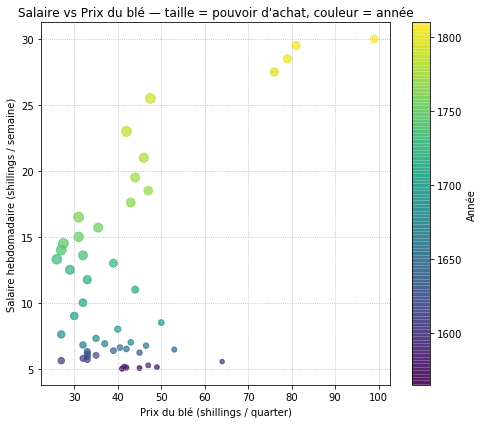

In [6]:
df['purchasing_power_kg_per_week'] = (df['wages'] / df['wheat']) * KG_PER_QUARTER
mask = (~df['wages'].isna()) & (~df['wheat'].isna())
wages_clean = df.loc[mask, 'wages'].values
wheat_clean = df.loc[mask, 'wheat'].values
years_clean  = df.loc[mask, 'year'].astype(float).values
pa_clean = df.loc[mask, 'purchasing_power_kg_per_week'].values
sizes = 20 + 80 * (pa_clean - np.nanmin(pa_clean)) / (np.nanmax(pa_clean) - np.nanmin(pa_clean) + 1e-9)

fig, ax = plt.subplots(figsize=(7, 6))
sc = ax.scatter(wheat_clean, wages_clean, s=sizes, c=years_clean, alpha=0.7)
ax.set_xlabel('Prix du blé (shillings / quarter)')
ax.set_ylabel('Salaire hebdomadaire (shillings / semaine)')
ax.set_title('Salaire vs Prix du blé — taille = pouvoir d\'achat, couleur = année')
ax.grid(True, linestyle=':')
cb = plt.colorbar(sc, ax=ax)
cb.set_label('Année')
plt.tight_layout()
plt.show()


Les **grosses bulles** indiquent un **pouvoir d’achat** élevé (beaucoup de kg de blé/semaine). La **couleur** encode la **chronologie** : on lit la progression historique sans afficher l’axe du temps.